# Data Merging 

## Reading in Datasets

* Read the datasets in and add a merge column, which is comprised of date, county, and state. Headers printed to ensure correct loading and modification of data. Columns were renamed in excel to a python-friendly name (i.e. _ instead of spaces) 

In [1]:
import pandas as pd
import csv

In [2]:

AQData = pd.read_csv('AQData.csv')
AQData = AQData.drop(['Unnamed: 0'], axis=1)
covidData = pd.read_csv('cleanedCovidData.csv')
covidData = covidData.drop(['Unnamed: 0'], axis=1)

In [3]:
AQData.head()

,Date_Local,State_Name,County_Name,Arithmetic_Mean_ppb,AQI_ozone,Arithmetic_Mean_cleaned,AQI_no2,Arithmetic_Mean,AQI,uniqueID
0,5/1/2020,Alabama,Baldwin,35.000000,50.000000,NaN,NaN,NaN,NaN,"Baldwin, Alabama"
1,5/1/2020,Alabama,DeKalb,47.000000,58.000000,NaN,NaN,NaN,NaN,"DeKalb, Alabama"
2,5/1/2020,Alabama,Elmore,28.000000,44.000000,NaN,NaN,NaN,NaN,"Elmore, Alabama"
3,5/1/2020,Alabama,Etowah,34.000000,51.000000,NaN,NaN,NaN,NaN,"Etowah, Alabama"
4,5/1/2020,Alabama,Jefferson,30.333333,47.666667,15.311553,32.0,11.0125,46.0,"Jefferson, Alabama"


In [4]:
covidData.head()

,date,county,state,fips,cases,deaths,uniqueId,daily cases,daily deaths
0,5/1/2020,Snohomish,Washington,53061,2466,108,"Snohomish, Washington",20,0
1,5/2/2020,Snohomish,Washington,53061,2492,108,"Snohomish, Washington",26,0
2,5/3/2020,Snohomish,Washington,53061,2737,108,"Snohomish, Washington",245,0
3,5/4/2020,Snohomish,Washington,53061,2784,110,"Snohomish, Washington",47,2
4,5/5/2020,Snohomish,Washington,53061,2807,110,"Snohomish, Washington",23,0


In [5]:
AQData['mergeID'] = AQData['County_Name'] + ', ' + AQData['State_Name'] + ', ' + AQData['Date_Local']
covidData['mergeID'] = covidData['county'] + ', ' + covidData['state'] + ', ' + covidData['date']

In [6]:
AQData.head()

,Date_Local,State_Name,County_Name,Arithmetic_Mean_ppb,AQI_ozone,Arithmetic_Mean_cleaned,AQI_no2,Arithmetic_Mean,AQI,uniqueID,mergeID
0,5/1/2020,Alabama,Baldwin,35.000000,50.000000,NaN,NaN,NaN,NaN,"Baldwin, Alabama","Baldwin, Alabama, 5/1/2020"
1,5/1/2020,Alabama,DeKalb,47.000000,58.000000,NaN,NaN,NaN,NaN,"DeKalb, Alabama","DeKalb, Alabama, 5/1/2020"
2,5/1/2020,Alabama,Elmore,28.000000,44.000000,NaN,NaN,NaN,NaN,"Elmore, Alabama","Elmore, Alabama, 5/1/2020"
3,5/1/2020,Alabama,Etowah,34.000000,51.000000,NaN,NaN,NaN,NaN,"Etowah, Alabama","Etowah, Alabama, 5/1/2020"
4,5/1/2020,Alabama,Jefferson,30.333333,47.666667,15.311553,32.0,11.0125,46.0,"Jefferson, Alabama","Jefferson, Alabama, 5/1/2020"


In [7]:
covidData.head()

,date,county,state,fips,cases,deaths,uniqueId,daily cases,daily deaths,mergeID
0,5/1/2020,Snohomish,Washington,53061,2466,108,"Snohomish, Washington",20,0,"Snohomish, Washington, 5/1/2020"
1,5/2/2020,Snohomish,Washington,53061,2492,108,"Snohomish, Washington",26,0,"Snohomish, Washington, 5/2/2020"
2,5/3/2020,Snohomish,Washington,53061,2737,108,"Snohomish, Washington",245,0,"Snohomish, Washington, 5/3/2020"
3,5/4/2020,Snohomish,Washington,53061,2784,110,"Snohomish, Washington",47,2,"Snohomish, Washington, 5/4/2020"
4,5/5/2020,Snohomish,Washington,53061,2807,110,"Snohomish, Washington",23,0,"Snohomish, Washington, 5/5/2020"


## Comparing Counties Present in Datasets 

* This below code tells us which counties are present in the AQData but not in the covidData (because covidData is the more comprehensive dataset). We convert the counties in both dataframes to a set, that may be subtracted easily. 

In [8]:
covidMergeSet = covidData['county'].to_list()
AQMergeSet = AQData['County_Name'].to_list()

In [9]:
AQMergeSet = set(AQMergeSet)
covidMergeSet = set(covidMergeSet)

In [10]:
differenceSet = AQMergeSet - covidMergeSet

In [11]:
print('List of counties in AQData but not in covidData: \n\n\n', differenceSet)

List of counties in AQData but not in covidData: 


 {'Hampton City', 'Saint Charles', 'Suffolk City', 'Sainte Genevieve', 'Saint Clair', 'Saint Louis', 'Bronx', 'Queens', 'Fairbanks North Star ', 'Baltimore (City)', 'New York', 'Denali ', 'St. Louis City'}


## Cleaning up Discrepant Values

In [11]:
# Sainte Genevieve (AQData county) is listed as Ste. Genevieve in covidData, this code changes that. The code changes
#both the county name and uniqueID columns

covidData.loc[covidData.county == "Ste. Genevieve", "uniqueID"] = "Sainte Genevieve, Missouri"
covidData.loc[covidData.county == "Ste. Genevieve", "county"] = "Sainte Genevieve"

In [12]:
#Hampton City (AQData county) is a city in Washington county, New York. There is no data for Washington, New York. 
#We will change this county name to Washington, New York.  

AQData.loc[AQData.County_Name == 'Hampton City', 'uniqueID'] = 'Washington, New York'
AQData.loc[AQData.County_Name == 'Hampton City', 'County_Name'] = 'Washington'

In [13]:
### this is to ignore an error we get on the next line of code
pd.options.mode.chained_assignment = None  # default='warn'

In [14]:
# New York has several burrows listed (AQData county), but only New York City, New York is listed on the covidData. 
# We will clone New York (have the same data four times), and change the county names to Bronx, Queens,
#Richmond (equivalent to Staten Island), and New York.
#This would allow it to merge with the AQData. 

bronxData = covidData[covidData['county'] == 'New York City']
queensData = covidData[covidData['county'] == 'New York City']
richmondNYData = covidData[covidData['county'] == 'New York City']

bronxData['uniqueID'] = 'Bronx, New York'
bronxData['county'] = 'Bronx'

queensData['uniqueID'] = 'Queens, New York'
queensData['county'] = 'Queens'

richmondNYData['uniqueID'] = 'Richmond, New York'
richmondNYData['county'] = 'Richmond'

covidData.loc[covidData.county == 'New York City', 'county'] = 'New York'

appendList = [covidData, bronxData, queensData, richmondNYData]
covidData = pd.concat(appendList)

In [15]:
# Baltimore City (AQData county) is a city within baltimore county, which we already have data for. For this reason,
#data from baltimore city will be dropped 
AQData = AQData[AQData['County_Name'] != 'Baltimore (City)']

In [16]:
#Fairbanks North Star Borough  (covidData) was listed as Fairbanks North Star in AQdata. We will change AQData to match
AQData.loc[AQData.County_Name == 'Fairbanks North Star ', 'uniqueID'] = 'Fairbanks North Star Borough, Alaska'
AQData.loc[AQData.County_Name == 'Fairbanks North Star ', 'County_Name'] = 'Fairbanks North Star Borough'


In [17]:
#Changes St. Charles (covidData) to Saint Charles to match AQData
covidData.loc[covidData.county == "St. Charles", "uniqueID"] = "Saint Charles, Missouri"
covidData.loc[covidData.county == "St. Charles", "county"] = "Saint Charles"

In [18]:
# In covidData, St. Louis needs to be 'Saint Louis'. There is also duplicated
#regions here, as St. Louis City and St. Louis County are the same area, so we will drop St Louis City from AQdata. 

covidData.loc[covidData.county == "St. Louis", "uniqueID"] = "Saint Louis, Missouri"
covidData.loc[covidData.county == "St. Louis", "county"] = "Saint Louis"
AQData = AQData[AQData['County_Name'] != 'St. Louis City']

In [19]:
# Suffolk city (covidData) changed to Suffolk City to match with AQData
covidData.loc[(covidData['county'] == "Suffolk city"), "uniqueID"] = "Suffolk City, Virginia"
covidData.loc[(covidData['county'] == "Suffolk city"), "county"] = "Suffolk City"

In [20]:
# St. Clair (covidData) changed to Saint Claire to match with AQData
covidData.loc[(covidData['county'] == 'St. Clair') & (covidData['state'] == 'Illinois'), "uniqueID"] = "Saint Clair, Illinois"
covidData.loc[(covidData['county'] == 'St. Clair') & (covidData['state'] == 'Illinois'), "county"] = "Saint Clair"

In [21]:
# Denali Borough changed to Denali to match with AQData
covidData.loc[covidData.county == "Denali Borough", "uniqueID"] = "Denali, Alaska"
covidData.loc[covidData.county == "Denali Borough", "county"] = "Denali "

In [22]:
# Fairbanks North Star Borough changed to Fairbanks North Star to match with AQData
covidData.loc[covidData.county == "Fairbanks North Star Borough", "uniqueID"] = "Fairbanks North Star, Alaska"
covidData.loc[covidData.county == "Fairbanks North Star Borough", "county"] = "Fairbanks North Star "

In [23]:
# Charles City (covidData) changed to Charles to match with AQData
covidData.loc[covidData.county == "Charles City", "uniqueID"] = "Charles, Virginia"
covidData.loc[covidData.county == "Charles City", "county"] = "Charles"

In [24]:
# AQData states "Hampton City", capitalizing C in covidData "Hampton city" to match up
covidData.loc[covidData.county == "Hampton city", "uniqueID"] = "Hampton City, Virginia"
covidData.loc[covidData.county == "Hampton city", "county"] = "Hampton City"

In [25]:
### checking success of cleaning
covidMergeSet = covidData['county'].to_list()
AQMergeSet = AQData['County_Name'].to_list()
AQMergeSet = set(AQMergeSet)
covidMergeSet = set(covidMergeSet)
differenceSet = AQMergeSet - covidMergeSet
print('List of counties in AQData but not in covidData: \n\n\n', differenceSet)

List of counties in AQData but not in covidData: 


 {'Fairbanks North Star Borough'}


In [26]:
#No AQData available widely on 11/1 11/2 11/3 11/4
AQData = AQData[AQData['Date_Local'] != '11/1/2020']
AQData = AQData[AQData['Date_Local'] != '11/2/2020']
AQData = AQData[AQData['Date_Local'] != '11/3/2020']
AQData = AQData[AQData['Date_Local'] != '11/4/2020']


* This shows us that all of our counties in the AQdata can also be found in the covidData dataset. This means our merge should be successful. 

## Comparing mergeIDs Present in Datasets

In [27]:
# resetting merge index following dataset changes

covidData['mergeID'] =  covidData['county'] + ', ' + covidData['state'] + ', ' + covidData['date']
AQData['mergeId'] = AQData['County_Name'] + ', ' + AQData['State_Name'] + ', ' + AQData['Date_Local']


## check which merge IDs exist in AQData, but not in covidData
covidMergeSet = covidData['mergeID'].to_list()
AQMergeSet = AQData['mergeID'].to_list()
AQMergeSet = set(AQMergeSet)
covidMergeSet = set(covidMergeSet)
differenceSet = AQMergeSet - covidMergeSet
print('List of mergeIDs in AQData but not in covidData: \n\n\n', differenceSet)
print('Number of rows in AQdata, but not in covidData: ', len(differenceSet))

List of mergeIDs in AQData but not in covidData: 


 {'Jackson, South Dakota, 5/1/2020', 'Powder River, Montana, 5/22/2020', 'Powder River, Montana, 5/28/2020', 'Fergus, Montana, 6/7/2020', 'Denali , Alaska, 6/8/2020', 'Powder River, Montana, 5/2/2020', 'Butte, Idaho, 6/12/2020', 'Butte, Idaho, 6/21/2020', 'Fergus, Montana, 6/13/2020', 'Monroe, Missouri, 5/24/2020', 'Powder River, Montana, 5/6/2020', 'Butte, Idaho, 7/21/2020', 'Trego, Kansas, 5/21/2020', 'Avery, North Carolina, 5/11/2020', 'Butte, Idaho, 7/27/2020', 'Butte, Idaho, 7/20/2020', 'Custer, South Dakota, 5/31/2020', 'Trego, Kansas, 5/3/2020', 'Trego, Kansas, 5/4/2020', 'Denali , Alaska, 5/3/2020', 'Butte, Idaho, 5/30/2020', 'Butte, Idaho, 6/17/2020', 'Custer, South Dakota, 5/30/2020', 'Weston, Wyoming, 5/3/2020', 'Phillips, Montana, 5/15/2020', 'Fergus, Montana, 5/21/2020', 'Rosebud, Montana, 5/5/2020', 'Trego, Kansas, 5/1/2020', 'Bell, Kentucky, 5/11/2020', 'Denali , Alaska, 6/21/2020', 'Butte, Idaho, 6/19/2020', 'Monroe, M

In [28]:
#providing new datasets after first round merge cleaning (1RMC)

AQData.to_csv('AQData1RMC.CSV')
covidData.to_csv('covidData1RMC.csv')

In [29]:
from collections import Counter

issueList = []
for x in differenceSet:
    cityState = ",".join(x.split(",", 2)[:2])
    issueList.append(cityState)
Counter(issueList)

Counter({'Jackson, South Dakota': 23,
         'Powder River, Montana': 68,
         'Fergus, Montana': 48,
         'Denali , Alaska': 55,
         'Butte, Idaho': 102,
         'Monroe, Missouri': 26,
         'Trego, Kansas': 21,
         'Avery, North Carolina': 18,
         'Custer, South Dakota': 33,
         'Weston, Wyoming': 24,
         'Phillips, Montana': 92,
         'Rosebud, Montana': 29,
         'Bell, Kentucky': 17,
         'Billings, North Dakota': 50,
         'Taylor, Wisconsin': 20,
         'Lake, Minnesota': 6,
         'Palo Alto, Iowa': 7,
         'Forest, Wisconsin': 5,
         'Mercer, North Dakota': 4,
         'Yancey, North Carolina': 2})

## Research into states with issues 
* Custer, South Dakota started on 6/4/2020
* Rosebud, Montana started on 6/2/2020
* Avery, North Carolina started on 5/19/2020
* Butte, Idaho started on 8/11/2020
* Phillips, Montana started on 8/5/2020
* Taylor, Wisconsin started on 5/21/2020
* Denali , Alaska started on 6/25/2020 (Denali Borough)
* Fergus, Montana started on 6/18/2020
* Powder River, Montana started on 7/23/2020
* Bell, Kentucky started on 5/18/2021
* Billings, North Dakota started on 6/20/2020
* Palo alto, Iowa started on 5/8/2020
* Jackson, SD started on 5/24/2020
* Trego, Kansas started on 5/22/2021
* Monroe, Miss started on 5/21/2020
* Weston, Wyoming started on 5/27/2020
* Mercer, North Dakota started on 5/5/2020
* Yancey, NC started on 5/3/2020
* Lake, Minnesota started on 5/7/2020
* Forest, Wisconsin started on 5/6/2020

* These dates will be missing from the dataset, because we cannot with certainty say that there were zero cases in all of these counties prior to the start date. These dates will hold null values in the dataframe. 

## Merging Data

In [30]:
mergedData = pd.merge(AQData, covidData, on="mergeID", how="left")
mergedData.head()

,Date_Local,State_Name,County_Name,Arithmetic_Mean_ppb,AQI_ozone,Arithmetic_Mean_cleaned,AQI_no2,Arithmetic_Mean,AQI,uniqueID_x,...,date,county,state,fips,cases,deaths,uniqueId,daily cases,daily deaths,uniqueID_y
0,5/1/2020,Alabama,Baldwin,35.000000,50.000000,NaN,NaN,NaN,NaN,"Baldwin, Alabama",...,5/1/2020,Baldwin,Alabama,1003.0,175.0,4.0,"Baldwin, Alabama",1.0,1.0,NaN
1,5/1/2020,Alabama,DeKalb,47.000000,58.000000,NaN,NaN,NaN,NaN,"DeKalb, Alabama",...,5/1/2020,DeKalb,Alabama,1049.0,76.0,2.0,"DeKalb, Alabama",0.0,0.0,NaN
2,5/1/2020,Alabama,Elmore,28.000000,44.000000,NaN,NaN,NaN,NaN,"Elmore, Alabama",...,5/1/2020,Elmore,Alabama,1051.0,88.0,2.0,"Elmore, Alabama",2.0,0.0,NaN
3,5/1/2020,Alabama,Etowah,34.000000,51.000000,NaN,NaN,NaN,NaN,"Etowah, Alabama",...,5/1/2020,Etowah,Alabama,1055.0,139.0,10.0,"Etowah, Alabama",0.0,1.0,NaN
4,5/1/2020,Alabama,Jefferson,30.333333,47.666667,15.311553,32.0,11.0125,46.0,"Jefferson, Alabama",...,5/1/2020,Jefferson,Alabama,1073.0,929.0,48.0,"Jefferson, Alabama",43.0,2.0,NaN


In [31]:
# making new dataframe with only columns we need

filteredMergedData = mergedData[['Date_Local', 'State_Name', 'County_Name', 'Arithmetic_Mean_ppb', 'AQI_ozone', 'Arithmetic_Mean_cleaned', 'AQI_no2', 'Arithmetic_Mean', 'AQI', 'daily cases', 'daily deaths']]

In [32]:
filteredMergedData.columns = ['Date', 'State', 'County', 'Arithmetic_Mean_ppb', 'AQI_Ozone', 'Arithmetic_Mean_Cleaned', 'AQI_No2','Arithmetic_Mean','AQI', 'Daily_Cases', 'Daily_Deaths']

In [33]:
filteredMergedData.head()

,Date,State,County,Arithmetic_Mean_ppb,AQI_Ozone,Arithmetic_Mean_Cleaned,AQI_No2,Arithmetic_Mean,AQI,Daily_Cases,Daily_Deaths
0,5/1/2020,Alabama,Baldwin,35.000000,50.000000,NaN,NaN,NaN,NaN,1.0,1.0
1,5/1/2020,Alabama,DeKalb,47.000000,58.000000,NaN,NaN,NaN,NaN,0.0,0.0
2,5/1/2020,Alabama,Elmore,28.000000,44.000000,NaN,NaN,NaN,NaN,2.0,0.0
3,5/1/2020,Alabama,Etowah,34.000000,51.000000,NaN,NaN,NaN,NaN,0.0,1.0
4,5/1/2020,Alabama,Jefferson,30.333333,47.666667,15.311553,32.0,11.0125,46.0,43.0,2.0


In [34]:
filteredMergedData.to_csv('filteredMergedData.csv')
print(filteredMergedData.dtypes)
#need to change date to datetime data type
filteredMergedData['Date']= pd.to_datetime(filteredMergedData['Date'])
print(filteredMergedData.dtypes)

Date                        object
State                       object
County                      object
Arithmetic_Mean_ppb        float64
AQI_Ozone                  float64
Arithmetic_Mean_Cleaned    float64
AQI_No2                    float64
Arithmetic_Mean            float64
AQI                        float64
Daily_Cases                float64
Daily_Deaths               float64
dtype: object
Date                       datetime64[ns]
State                              object
County                             object
Arithmetic_Mean_ppb               float64
AQI_Ozone                         float64
Arithmetic_Mean_Cleaned           float64
AQI_No2                           float64
Arithmetic_Mean                   float64
AQI                               float64
Daily_Cases                       float64
Daily_Deaths                      float64
dtype: object


In [35]:
dailyGroup = filteredMergedData.groupby('Date').mean()

In [36]:
import matplotlib.pyplot as plt

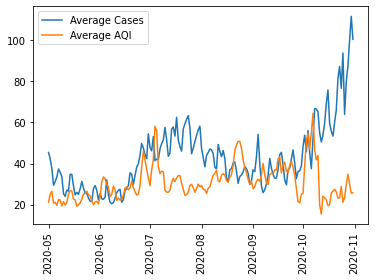

In [37]:
plt.plot(dailyGroup['Daily_Cases'], label ='Average Cases')
plt.plot(dailyGroup['AQI'], label = 'Average AQI')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [38]:
AQCount = AQData.groupby('Date_Local').count()
AQCount

,State_Name,County_Name,Arithmetic_Mean_ppb,AQI_ozone,Arithmetic_Mean_cleaned,AQI_no2,Arithmetic_Mean,AQI,uniqueID,mergeID,mergeId
Date_Local,,,,,,,,,,,
10/1/2020,43,43,43,43,15,15,21,21,43,43,43
10/10/2020,36,36,36,36,15,15,19,19,36,36,36
10/11/2020,36,36,36,36,15,15,19,19,36,36,36
10/12/2020,36,36,36,36,15,15,19,19,36,36,36
10/13/2020,35,35,35,35,14,14,18,17,35,35,35
...,...,...,...,...,...,...,...,...,...,...,...
9/5/2020,301,301,301,301,70,70,110,110,301,301,301
9/6/2020,301,301,301,301,69,69,141,141,301,301,301
9/7/2020,302,302,302,302,68,68,111,111,302,302,302


## Datasets by Measurement

In [53]:
#No2

no2Data = filteredMergedData[filteredMergedData['AQI_No2'].notnull()]
print(no2Data.isnull().sum())
no2Data.to_csv('No2+COVID_Data.csv')

Date                          0
State                         0
County                        0
Arithmetic_Mean_ppb           0
AQI_Ozone                     0
Arithmetic_Mean_Cleaned       0
AQI_No2                       0
Arithmetic_Mean            4827
AQI                        4992
Daily_Cases                 296
Daily_Deaths                296
dtype: int64


In [54]:
#Ozone

ozoneData = filteredMergedData[filteredMergedData['AQI_Ozone'].notnull()]
print(ozoneData.isnull().sum())
ozoneData.to_csv('Ozone+COVID_Data.csv')

Date                           0
State                          0
County                         0
Arithmetic_Mean_ppb            0
AQI_Ozone                      0
Arithmetic_Mean_Cleaned    59912
AQI_No2                    59912
Arithmetic_Mean            41744
AQI                        42241
Daily_Cases                  650
Daily_Deaths                 650
dtype: int64


In [55]:
#AQI

AQIData = filteredMergedData[filteredMergedData['AQI'].notnull()]
print(AQIData.isnull().sum())
AQIData.to_csv('AQI+COVID_Data.csv')

Date                           0
State                          0
County                         0
Arithmetic_Mean_ppb            0
AQI_Ozone                      0
Arithmetic_Mean_Cleaned    22663
AQI_No2                    22663
Arithmetic_Mean                0
AQI                            0
Daily_Cases                  386
Daily_Deaths                 386
dtype: int64
